# Bike Sharing EDA PROJECT

### 1- Importing data

In [21]:
import pandas as pd
import numpy as np

path ="C:\\Users\\Rasha\\Downloads\\Bike Sharing EDA project\\london_merged.csv"
df = pd.read_csv(path)
df.head()



,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


#### Metadata:

"timestamp" - timestamp field for grouping the data
"cnt" - the count of a new bike shares
"t1" - real temperature in C
"t2" - temperature in C "feels like"
"hum" - humidity in percentage
"wind_speed" - wind speed in km/h
"weather_code" - category of the weather
"is_holiday" - boolean field - 1 holiday / 0 non holiday
"is_weekend" - boolean field - 1 if the day is weekend
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weather_code" category description:

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 

2 = scattered clouds / few clouds 

3 = Broken clouds 

4 = Cloudy 

7 = Rain/ light Rain shower/ Light rain 

10 = rain with thunderstorm 

26 = snowfall 

94 = Freezing Fog

### 2- Data wrangling

In [23]:
# creating date and time features
df.timestamp = pd.to_datetime(df.timestamp)
df['year'] = df.timestamp.dt.year.astype('object')
df['month'] = df.timestamp.dt.month.astype('object')
df['day'] = df.timestamp.dt.day.astype('object')
df['hour'] = df.timestamp.dt.hour.astype('object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
 10  year          17414 non-null  object        
 11  month         17414 non-null  object        
 12  day           17414 non-null  object        
 13  hour          17414 non-null  object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(4)
memory usage: 1.9+ MB


In [25]:
# Deleting timestamp column
df=df.iloc[:,1:]
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4


In [26]:
# Mapping all categorical data (weather code, season, month)

weatherdict= {1:'Clear', 2: 'scattered clouds', 3 :'Broken clouds', 4 :'Cloudy', 7 : 'Rain', 10 : 'rain with thunderstorm', 26 : 'snowfall', 94 : 'Freezing Fog'}
seasondict= {0:'spring' , 1:'summer' , 2:'fall' , 3:'winter'}
monthdict= {1:'January' , 2:'February' , 3:'March' , 4:'April', 5: 'May', 6:'June', 7:'July', 8: 'August', 9: 'September', 10 : 'October', 11: 'November', 12:'December'}

df['weather_code'] = df['weather_code'].map(weatherdict).astype('object')
df['season'] = df['season'].map(seasondict).astype('object')
df['month'] =df['month'].map(monthdict).astype ('object')

In [27]:
df['weather_code'].value_counts()
df['month'].unique()
df ['year'].unique()

array([2015, 2016, 2017], dtype=object)

In [28]:
# creating time groups

import numpy as np
bins= (-1, 5, 11, 17, 24)
groupnames = ('MidNight', 'Morning', 'Afternoon', 'Evening')
df['time_of_day']=pd.cut(df['hour'], bins , labels = groupnames)
df.sample(10)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,time_of_day
5736,789,16.0,16.0,88.0,16.0,Broken clouds,1.0,0.0,summer,2015,August,31,15,Afternoon
2555,2273,12.5,12.5,52.5,21.0,Clear,0.0,0.0,spring,2015,April,20,19,Evening
6132,1022,16.0,16.0,68.0,17.0,scattered clouds,0.0,0.0,fall,2015,September,17,11,Morning
4415,1217,20.0,20.0,73.0,19.5,Cloudy,0.0,0.0,summer,2015,July,7,10,Morning
13195,237,19.0,19.0,80.5,20.0,Cloudy,0.0,1.0,summer,2016,July,10,7,Morning
1994,118,9.0,7.5,90.5,10.0,Broken clouds,0.0,1.0,spring,2015,March,28,4,MidNight
4321,1911,24.0,24.0,45.5,16.0,Clear,0.0,0.0,summer,2015,July,3,12,Afternoon
4908,64,15.0,15.0,77.0,27.0,Cloudy,0.0,0.0,summer,2015,July,28,3,MidNight
16814,526,12.0,12.0,82.0,14.0,Clear,0.0,1.0,winter,2016,December,10,0,MidNight
3210,97,11.0,11.0,77.0,15.0,scattered clouds,0.0,0.0,spring,2015,May,18,2,MidNight


In [29]:
#total shared bikes in 3 years 2015- 2017
total_shared_bikes =df['cnt'].sum()
total_shared_bikes

19905972

### 3- Data visualization

<function matplotlib.pyplot.show(close=None, block=None)>

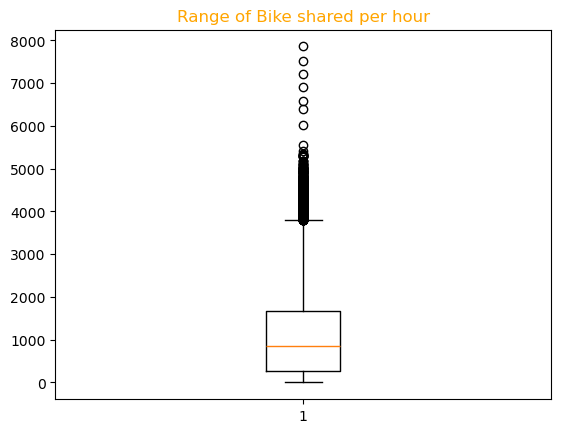

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.boxplot(data =df, x=df['cnt'])
plt.title ("Range of Bike shared per hour", color ='orange')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

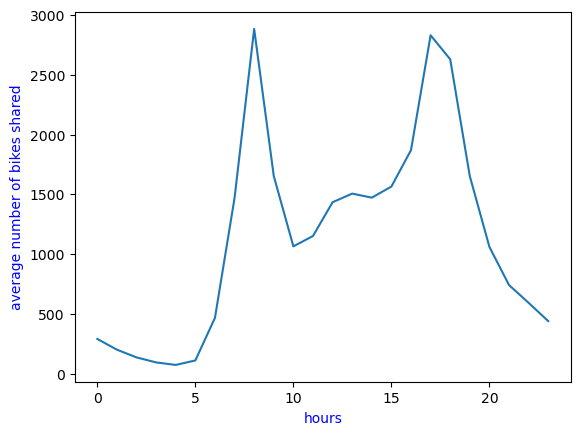

In [31]:
plt.plot(df.groupby('hour')['cnt'].mean())
plt.xlabel("hours", color ='blue')
plt.ylabel("average number of bikes shared each hour", color ='blue')
plt.show

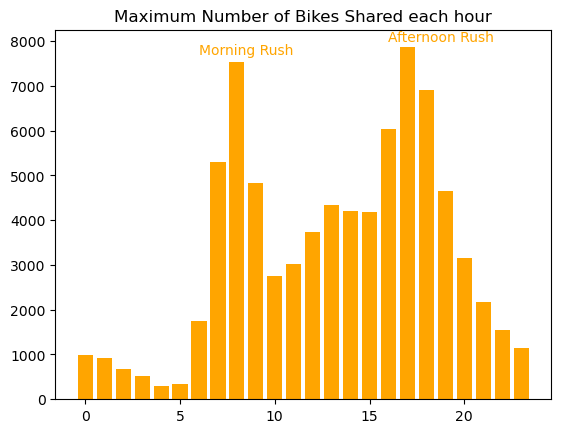

In [32]:
plt.bar(df['hour'], df['cnt'], color = 'orange')
plt.title('Maximum Number of Bikes Shared each hour')
plt.annotate('Afternoon Rush', xy= (16,8000), color = 'orange')
plt.annotate('Morning Rush', xy= (6,7700), color = 'orange')
plt.show()

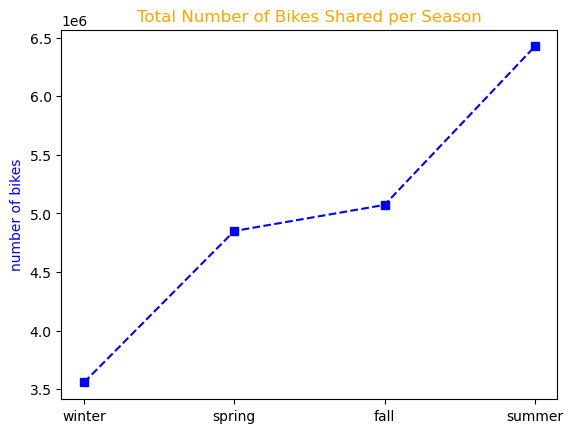

In [33]:
x= pd.DataFrame(df.groupby('season')['cnt'].sum()).sort_values(by ='cnt')
plt.plot(x, marker= 's', color = 'blue' , linestyle = '--')
plt.title("Total Number of Bikes Shared per Season", color ='orange')
plt.ylabel("number of bikes", color ='blue')
plt.show()

In [34]:
#like above chart number of bike shared each season
df.groupby('season')['cnt'].sum() ,  df.groupby('season')['cnt'].sum().index

(season
 fall      5073040
 spring    4850236
 summer    6424609
 winter    3558087
 Name: cnt, dtype: int64,
 Index(['fall', 'spring', 'summer', 'winter'], dtype='object', name='season'))

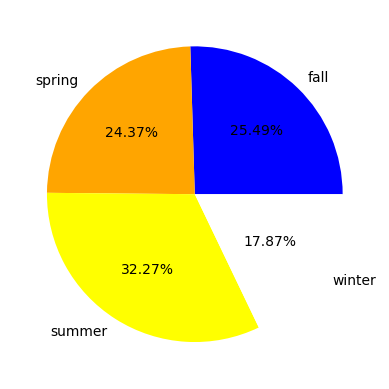

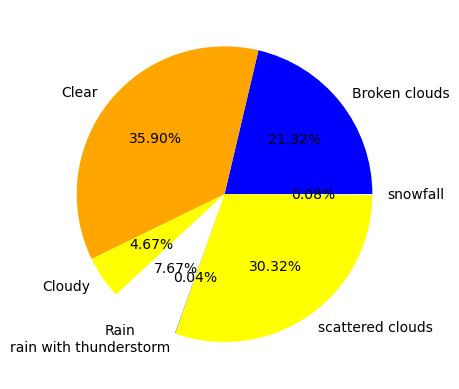

C:\Users\Rasha\AppData\Local\Temp\ipykernel_876\3617115683.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



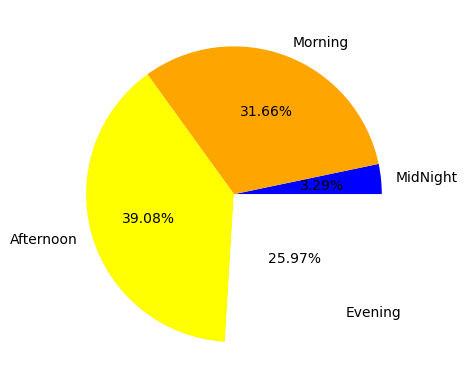

In [35]:
# percentage of shared bikes according to season
# percentage of shared bikes according to weather
# percentage of shared bikes according to time of day


cat=[ 'season' , 'weather_code', 'time_of_day']
colors = [ 'blue' ,'orange', 'yellow', 'white','blue' ,'yellow','white' ,  'orange']
for i in cat:
    plt.pie(df.groupby(i)['cnt'].sum(), labels = df.groupby(i)['cnt'].sum().index, autopct ='%1.2f%%', colors = colors)
    plt.show()


In [36]:

df.groupby('time_of_day')['cnt'].mean()

C:\Users\Rasha\AppData\Local\Temp\ipykernel_876\695047487.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



time_of_day
MidNight      151.099492
Morning      1447.256946
Afternoon    1779.158051
Evening      1187.170149
Name: cnt, dtype: float64

C:\Users\Rasha\AppData\Local\Temp\ipykernel_876\1181086293.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



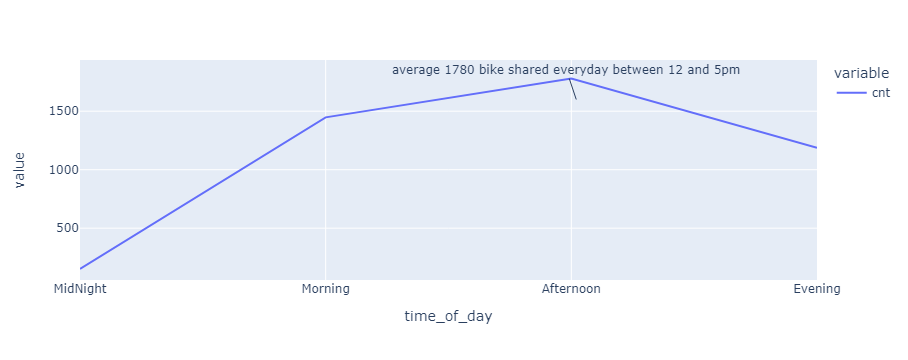

In [37]:
# average shared bikes according to time using line chart
meanpertime = pd.DataFrame(df.groupby('time_of_day')['cnt'].mean())
fig =px.line(meanpertime)
fig.add_annotation(text ='average 1780 bike shared everyday between 12 and 5pm', x = 2.02, y=1600)
fig.show()

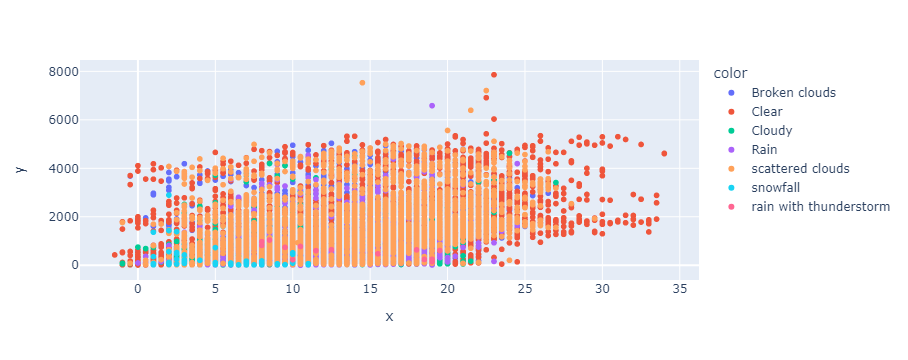

In [38]:
# bike shared according to weather code
fig = px.scatter(x= df['t1'], y =df['cnt'] , color= df['weather_code'])
fig.show()

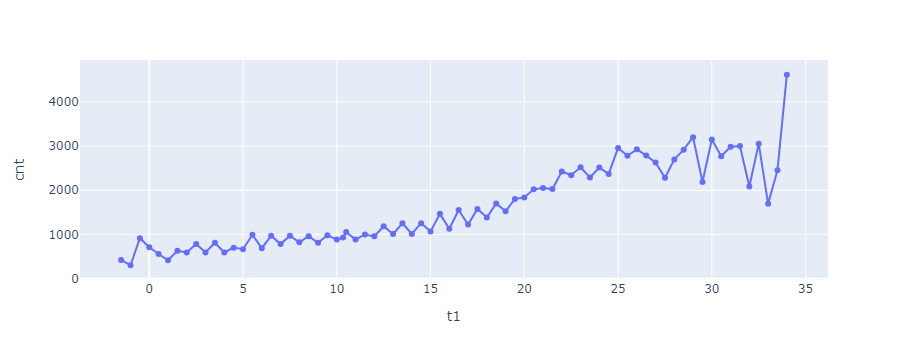

In [39]:
#average of shared bike according to temperature
# when temperature increase number of shared bikes increase
t1 = pd.DataFrame(df.groupby('t1')['cnt'].mean())
fig = px.line(t1, x=t1.index, y="cnt", markers=True)
fig.show()